In [2]:
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette("Set1")
sns.set_context('talk')

log_dir = "logs/"
fig_dir = "figures/"

In [17]:
def plot_rl_results(results_df, results_type, T, step_size, labels, 
                    x_label=r"$\times 10^4$ Iterations", y_label="Episode Reward",
                    plot_title="Results Time Series", save_fname=None):
    for i, mean_series in enumerate(results_df):
        if results_type == "rew_mean":
            line = plt.plot(results_df[i].loc[:T, "opt_counter"], results_df[i].loc[:T, "rew_mean"],
                            label=labels[i])
            plt.fill_between(results_df[i].loc[:T, "opt_counter"],
                             results_df[i].loc[:T, "rew_mean"] - 2*results_df[i].loc[:T, "rew_sd"],
                             results_df[i].loc[:T, "rew_mean"] + 2*results_df[i].loc[:T, "rew_sd"],
                             color=line[0].get_color(), alpha=0.25)
        elif results_type == "rew_median":
            line = plt.plot(results_df[i].loc[:T, "opt_counter"], results_df[i].loc[:T, "rew_median"],
                            label=labels[i])
            plt.fill_between(results_df[i].loc[:T, "opt_counter"],
                             results_df[i].loc[:T, "rew_10th_p"],
                             results_df[i].loc[:T, "rew_90th_p"],
                             color=line[0].get_color(), alpha=0.25)

    its_ticks = np.arange(step_size, np.max(results_df[i].loc[:T, "opt_counter"]), step_size)
    its_labels_temp = [str(int(it/step_size)) for it in its_ticks]
    its_labels = [it_l for it_l in its_labels_temp]
    its_labels[0] = r"$1$"
    
    plt.xticks(its_ticks, its_labels, fontsize=9)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(fontsize=12)
    plt.title(plot_title)
    plt.tight_layout()
    
    if not save_fname is None:
        plt.savefig(save_fname, dpi=300)
        print("Saved figure to {}".format(save_fname))
    return line

# Plots Plain DQN

In [2]:
# Load in DQN logs
dqn_capacity_5000 = pd.read_csv(log_dir + "dqn_capacity_5000.csv")
dqn_capacity_20000 = pd.read_csv(log_dir + "dqn_capacity_20000.csv")
dqn_capacity_40000 = pd.read_csv(log_dir + "dqn_capacity_40000.csv")

dqn_batchsize_32 = pd.read_csv(log_dir + "dqn_batchsize_32.csv")
dqn_batchsize_64 = pd.read_csv(log_dir + "dqn_batchsize_64.csv")
dqn_batchsize_128 = pd.read_csv(log_dir + "dqn_batchsize_128.csv")

dqn_lrate_1e3 = pd.read_csv(log_dir + "dqn_lrate_1e3.csv")
dqn_lrate_1e4 = pd.read_csv(log_dir + "dqn_lrate_1e4.csv")
dqn_lrate_1e5 = pd.read_csv(log_dir + "dqn_lrate_1e5.csv")

dqn_hard_update_1 = pd.read_csv(log_dir + "dqn_hard_update_1.csv")
dqn_hard_update_100 = pd.read_csv(log_dir + "dqn_hard_update_100.csv")
dqn_soft_update_001 = pd.read_csv(log_dir + "dqn_soft_update_001.csv")
dqn_soft_update_005 = pd.read_csv(log_dir + "dqn_soft_update_005.csv")

Saved figure to figures/dqn_buffer.png
Saved figure to figures/dqn_batch_size.png
Saved figure to figures/dqn_lrate.png
Saved figure to figures/dqn_target_update.png


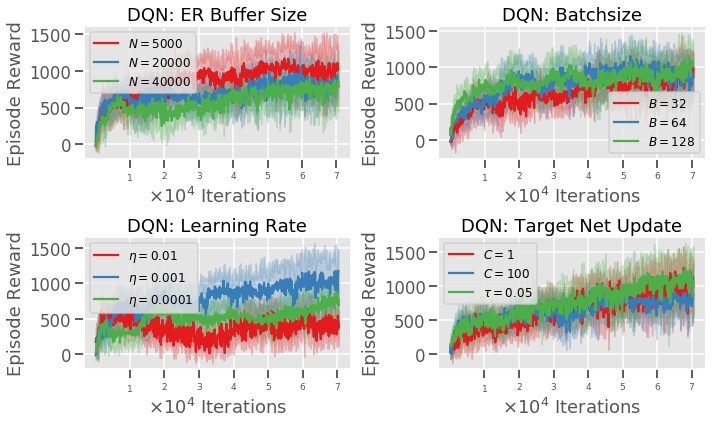

In [41]:
fig = plt.figure(figsize = (10, 6))
plt.subplot(2, 2, 1)
results_df = [dqn_capacity_5000, dqn_capacity_20000, dqn_capacity_40000]
labels_cap = [r"$N=5000$", r"$N=20000$", r"$N=40000$"]
plot_rl_results(results_df, results_type="rew_mean", T=700, step_size=10000, labels=labels_cap, 
                x_label=r"$\times 10^4$ Iterations", y_label="Episode Reward",
                plot_title="DQN: ER Buffer Size", save_fname=fig_dir + "dqn_buffer.png")

plt.subplot(2, 2, 2)
results_df = [dqn_batchsize_32, dqn_batchsize_64, dqn_batchsize_128]
labels_cap = [r"$B=32$", r"$B=64$", r"$B=128$"]
plot_rl_results(results_df, results_type="rew_mean", T=700, step_size=10000, labels=labels_cap, 
                x_label=r"$\times 10^4$ Iterations", y_label="Episode Reward",
                plot_title="DQN: Batchsize", save_fname=fig_dir + "dqn_batch_size.png")

plt.subplot(2, 2, 3)
results_df = [dqn_lrate_1e3, dqn_lrate_1e4, dqn_lrate_1e5]
labels_cap = [r"$\eta = 0.01$", r"$\eta = 0.001$", r"$\eta = 0.0001$"]
plot_rl_results(results_df, results_type="rew_mean", T=700, step_size=10000, labels=labels_cap, 
                x_label=r"$\times 10^4$ Iterations", y_label="Episode Reward",
                plot_title="DQN: Learning Rate", save_fname=fig_dir + "dqn_lrate.png")

plt.subplot(2, 2, 4)
results_df = [dqn_hard_update_1, dqn_hard_update_100, dqn_soft_update_001]
labels_cap = [r"$C = 1$", r"$C = 100$", r"$\tau = 0.05$"]
plot_rl_results(results_df, results_type="rew_mean", T=700, step_size=10000, labels=labels_cap, 
                x_label=r"$\times 10^4$ Iterations", y_label="Episode Reward",
                plot_title="DQN: Target Net Update", save_fname=fig_dir + "dqn_target_update.png")
plt.show()

# Plots Double DQN

In [382]:
# Load in Double DQN Logs
ddqn_soft_update_001 = pd.read_csv(log_dir + "ddqn_soft_update_001.csv")
ddqn_soft_update_005 = pd.read_csv(log_dir + "ddqn_soft_update_005.csv")
ddqn_soft_update_01 = pd.read_csv(log_dir + "ddqn_soft_update_01.csv")

ddqn_gamma_09 = pd.read_csv(log_dir + "ddqn_gamma_09.csv")
ddqn_gamma_095 = pd.read_csv(log_dir + "ddqn_gamma_095.csv")
ddqn_gamma_099 = pd.read_csv(log_dir + "ddqn_gamma_099.csv")

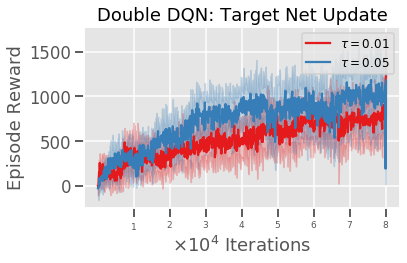

In [383]:
its_ticks = np.arange(10000, np.max(ddqn_soft_update_001.loc[:, "opt_counter"]), 10000)
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
# Double Target Update Plot
rew_1 = plt.plot(ddqn_soft_update_001.loc[:, "opt_counter"], ddqn_soft_update_001.loc[:, "rew_mean"], label=r"$\tau = 0.01$")
plt.fill_between(ddqn_soft_update_001.loc[:, "opt_counter"],
                 ddqn_soft_update_001.loc[:, "rew_mean"] - 2*ddqn_soft_update_001.loc[:, "rew_sd"],
                 ddqn_soft_update_001.loc[:, "rew_mean"] + 2*ddqn_soft_update_001.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(ddqn_soft_update_005.loc[:, "opt_counter"], ddqn_soft_update_005.loc[:, "rew_mean"], label=r"$\tau = 0.05$")
plt.fill_between(ddqn_soft_update_005.loc[:, "opt_counter"],
                 ddqn_soft_update_005.loc[:, "rew_mean"] - 2*ddqn_soft_update_005.loc[:, "rew_sd"],
                 ddqn_soft_update_005.loc[:, "rew_mean"] + 2*ddqn_soft_update_005.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

#rew_3 = plt.plot(ddqn_soft_update_01.loc[:, "opt_counter"], ddqn_soft_update_01.loc[:, "rew_mean"], label=r"$\tau = 0.1$")
#plt.fill_between(ddqn_soft_update_01.loc[:, "opt_counter"],
#                 ddqn_soft_update_01.loc[:, "rew_mean"] - 2*ddqn_soft_update_01.loc[:, "rew_sd"],
#                 ddqn_soft_update_01.loc[:, "rew_mean"] + 2*ddqn_soft_update_01.loc[:, "rew_sd"],
#                 color=rew_3[0].get_color(), alpha=0.25)

plt.xticks(its_ticks, its_labels, fontsize=9)
plt.xlabel(r"$\times 10^4$ Iterations")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("Double DQN: Target Net Update")
plt.tight_layout()
plt.savefig(fig_dir + "ddqn_target_update.png", dpi=300)

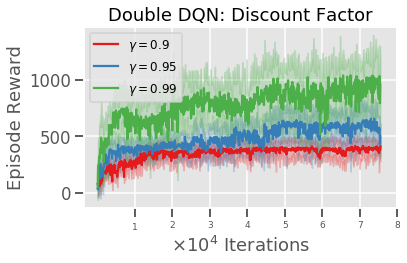

In [384]:
T = 750
its_ticks = np.arange(10000, np.max(ddqn_gamma_09.loc[:, "opt_counter"]), 10000)
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
# Double Gamma Discount Plot
rew_1 = plt.plot(ddqn_gamma_09.loc[:T, "opt_counter"], ddqn_gamma_09.loc[:T, "rew_mean"], label=r"$\gamma = 0.9$")
plt.fill_between(ddqn_gamma_09.loc[:T, "opt_counter"],
                 ddqn_gamma_09.loc[:T, "rew_mean"] - 2*ddqn_gamma_09.loc[:T, "rew_sd"],
                 ddqn_gamma_09.loc[:T, "rew_mean"] + 2*ddqn_gamma_09.loc[:T, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(ddqn_gamma_095.loc[:T, "opt_counter"], ddqn_gamma_095.loc[:T, "rew_mean"], label=r"$\gamma = 0.95$")
plt.fill_between(ddqn_gamma_095.loc[:T, "opt_counter"],
                 ddqn_gamma_095.loc[:T, "rew_mean"] - 2*ddqn_gamma_095.loc[:T, "rew_sd"],
                 ddqn_gamma_095.loc[:T, "rew_mean"] + 2*ddqn_gamma_095.loc[:T, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(ddqn_gamma_099.loc[:T, "opt_counter"], ddqn_gamma_099.loc[:T, "rew_mean"], label=r"$\gamma = 0.99$")
plt.fill_between(ddqn_gamma_099.loc[:T, "opt_counter"],
                 ddqn_gamma_099.loc[:T, "rew_mean"] - 2*ddqn_gamma_099.loc[:T, "rew_sd"],
                 ddqn_gamma_099.loc[:T, "rew_mean"] + 2*ddqn_gamma_099.loc[:T, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xticks(its_ticks, its_labels, fontsize=9)
plt.xlabel(r"$\times 10^4$ Iterations")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("Double DQN: Discount Factor")
plt.tight_layout()
plt.savefig(fig_dir + "ddqn_gamma.png", dpi=300)

# Plots Prioritized ER DQN

In [385]:
# Load in PER DQN Logs
per_dqn_alpha_02 = pd.read_csv(log_dir + "per_dqn_alpha_02.csv")
per_dqn_alpha_05 = pd.read_csv(log_dir + "per_dqn_alpha_05.csv")
per_dqn_alpha_08 = pd.read_csv(log_dir + "per_dqn_alpha_08.csv")

per_dqn_beta_02 = pd.read_csv(log_dir + "per_dqn_beta_02.csv")
per_dqn_beta_05 = pd.read_csv(log_dir + "per_dqn_beta_05.csv")
per_dqn_beta_08 = pd.read_csv(log_dir + "per_dqn_beta_08.csv")

per_dqn_capacity_5000 = pd.read_csv(log_dir + "per_dqn_capacity_5000.csv")
per_dqn_capacity_20000 = pd.read_csv(log_dir + "per_dqn_capacity_20000.csv")
per_dqn_capacity_40000 = pd.read_csv(log_dir + "per_dqn_capacity_40000.csv")

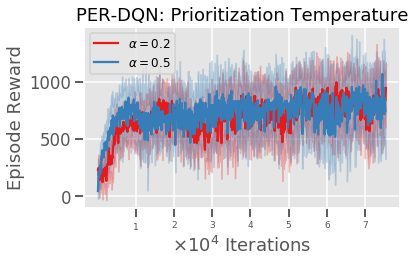

In [386]:
its_ticks = np.arange(10000, np.max(per_dqn_alpha_02.loc[:T, "opt_counter"]), 10000)
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
# Alpha Boltzmann Plot
rew_1 = plt.plot(per_dqn_alpha_02.loc[:T, "opt_counter"], per_dqn_alpha_02.loc[:T, "rew_mean"], label=r"$\alpha = 0.2$")
plt.fill_between(per_dqn_alpha_02.loc[:T, "opt_counter"],
                 per_dqn_alpha_02.loc[:T, "rew_mean"] - 2*per_dqn_alpha_02.loc[:T, "rew_sd"],
                 per_dqn_alpha_02.loc[:T, "rew_mean"] + 2*per_dqn_alpha_02.loc[:T, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(per_dqn_alpha_05.loc[:T, "opt_counter"], per_dqn_alpha_05.loc[:T, "rew_mean"], label=r"$\alpha = 0.5$")
plt.fill_between(per_dqn_alpha_05.loc[:T, "opt_counter"],
                 per_dqn_alpha_05.loc[:T, "rew_mean"] - 2*per_dqn_alpha_05.loc[:T, "rew_sd"],
                 per_dqn_alpha_05.loc[:T, "rew_mean"] + 2*per_dqn_alpha_05.loc[:T, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

#rew_3 = plt.plot(per_dqn_alpha_08.loc[:T, "opt_counter"], per_dqn_alpha_08.loc[:T, "rew_mean"], label=r"$\alpha = 0.8$")
#plt.fill_between(per_dqn_alpha_08.loc[:T, "opt_counter"],
#                 per_dqn_alpha_08.loc[:T, "rew_mean"] - 2*per_dqn_alpha_08.loc[:T, "rew_sd"],
#                 per_dqn_alpha_08.loc[:T, "rew_mean"] + 2*per_dqn_alpha_08.loc[:T, "rew_sd"],
#                 color=rew_3[0].get_color(), alpha=0.25)

plt.xticks(its_ticks, its_labels, fontsize=9)
plt.xlabel(r"$\times 10^4$ Iterations")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("PER-DQN: Prioritization Temperature")
plt.tight_layout()
plt.savefig(fig_dir + "per_dqn_temp.png", dpi=300)

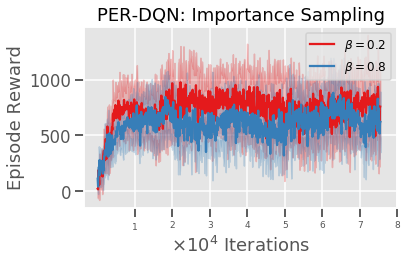

In [387]:
its_ticks = np.arange(10000, np.max(per_dqn_beta_02.loc[:, "opt_counter"]), 10000)
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
# Importance Sampling Plot
rew_1 = plt.plot(per_dqn_beta_02.loc[:T, "opt_counter"], per_dqn_beta_02.loc[:T, "rew_mean"], label=r"$\beta = 0.2$")
plt.fill_between(per_dqn_beta_02.loc[:T, "opt_counter"],
                 per_dqn_beta_02.loc[:T, "rew_mean"] - 2*per_dqn_beta_02.loc[:T, "rew_sd"],
                 per_dqn_beta_02.loc[:T, "rew_mean"] + 2*per_dqn_beta_02.loc[:T, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

#rew_2 = plt.plot(per_dqn_beta_05.loc[:, "opt_counter"], per_dqn_beta_05.loc[:, "rew_mean"], label=r"$\beta = 0.5$")
#plt.fill_between(per_dqn_beta_05.loc[:, "opt_counter"],
#                 per_dqn_beta_05.loc[:, "rew_mean"] - 2*per_dqn_beta_05.loc[:, "rew_sd"],
#                 per_dqn_beta_05.loc[:, "rew_mean"] + 2*per_dqn_beta_05.loc[:, "rew_sd"],
#                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(per_dqn_beta_08.loc[:T, "opt_counter"], per_dqn_beta_08.loc[:T, "rew_mean"], label=r"$\beta = 0.8$")
plt.fill_between(per_dqn_beta_08.loc[:T, "opt_counter"],
                 per_dqn_beta_08.loc[:T, "rew_mean"] - 2*per_dqn_beta_08.loc[:T, "rew_sd"],
                 per_dqn_beta_08.loc[:T, "rew_mean"] + 2*per_dqn_beta_08.loc[:T, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xticks(its_ticks, its_labels, fontsize=9)
plt.xlabel(r"$\times 10^4$ Iterations")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("PER-DQN: Importance Sampling")
plt.tight_layout()
plt.savefig(fig_dir + "per_dqn_is.png", dpi=300)

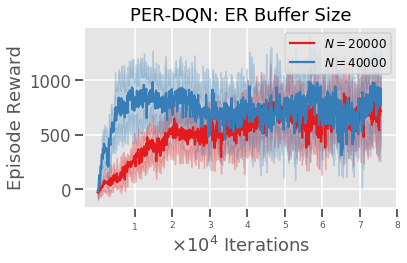

In [388]:
its_ticks = np.arange(10000, np.max(per_dqn_capacity_5000.loc[:, "opt_counter"]), 10000)
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
# Importance Sampling Plot
#rew_1 = plt.plot(per_dqn_capacity_5000.loc[:, "opt_counter"], per_dqn_capacity_5000.loc[:, "rew_mean"], label=r"$N = 5000$")
#plt.fill_between(per_dqn_capacity_5000.loc[:, "opt_counter"],
#                 per_dqn_capacity_5000.loc[:, "rew_mean"] - 2*per_dqn_capacity_5000.loc[:, "rew_sd"],
#                 per_dqn_capacity_5000.loc[:, "rew_mean"] + 2*per_dqn_capacity_5000.loc[:, "rew_sd"],
#                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(per_dqn_capacity_20000.loc[:T, "opt_counter"], per_dqn_capacity_20000.loc[:T, "rew_mean"], label=r"$N = 20000$")
plt.fill_between(per_dqn_capacity_20000.loc[:T, "opt_counter"],
                 per_dqn_capacity_20000.loc[:T, "rew_mean"] - 2*per_dqn_capacity_20000.loc[:T, "rew_sd"],
                 per_dqn_capacity_20000.loc[:T, "rew_mean"] + 2*per_dqn_capacity_20000.loc[:T, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(per_dqn_capacity_40000.loc[:T, "opt_counter"], per_dqn_capacity_40000.loc[:T, "rew_mean"], label=r"$N = 40000$")
plt.fill_between(per_dqn_capacity_40000.loc[:T, "opt_counter"],
                 per_dqn_capacity_40000.loc[:T, "rew_mean"] - 2*per_dqn_capacity_40000.loc[:T, "rew_sd"],
                 per_dqn_capacity_40000.loc[:T, "rew_mean"] + 2*per_dqn_capacity_40000.loc[:T, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xticks(its_ticks, its_labels, fontsize=9)
plt.xlabel(r"$\times 10^4$ Iterations")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("PER-DQN: ER Buffer Size")
plt.tight_layout()
plt.savefig(fig_dir + "per_dqn_er.png", dpi=300)

# Plots Dueling DQN

In [389]:
# Load in Dueling DQN Logs
dueling_dqn_64 = pd.read_csv(log_dir + "dueling_dqn_64.csv")
dueling_dqn_128 = pd.read_csv(log_dir + "dueling_dqn_128.csv")
dueling_dqn_256 = pd.read_csv(log_dir + "dueling_dqn_256.csv")

dueling_dqn = pd.read_csv(log_dir + "dueling_dqn.csv")
per_dueling_dqn = pd.read_csv(log_dir + "per_dueling_dqn.csv")
double_dueling_dqn = pd.read_csv(log_dir + "double_dueling_dqn.csv")
per_double_dueling_dqn = pd.read_csv(log_dir + "per_double_dueling_dqn.csv")

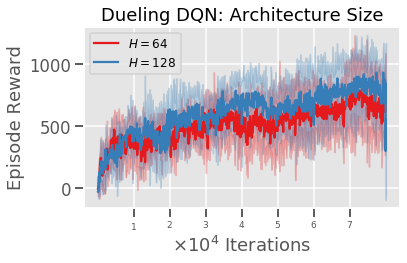

In [390]:
its_ticks = np.arange(10000, np.max(dueling_dqn_64.loc[:, "opt_counter"]), 10000)
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
# Architecture Plot
rew_1 = plt.plot(dueling_dqn_64.loc[:, "opt_counter"], dueling_dqn_64.loc[:, "rew_mean"], label=r"$H = 64$")
plt.fill_between(dueling_dqn_64.loc[:, "opt_counter"],
                 dueling_dqn_64.loc[:, "rew_mean"] - 2*dueling_dqn_64.loc[:, "rew_sd"],
                 dueling_dqn_64.loc[:, "rew_mean"] + 2*dueling_dqn_64.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(dueling_dqn_128.loc[:, "opt_counter"], dueling_dqn_128.loc[:, "rew_mean"], label=r"$H = 128$")
plt.fill_between(dueling_dqn_128.loc[:, "opt_counter"],
                 dueling_dqn_128.loc[:, "rew_mean"] - 2*dueling_dqn_128.loc[:, "rew_sd"],
                 dueling_dqn_128.loc[:, "rew_mean"] + 2*dueling_dqn_128.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

#rew_3 = plt.plot(dueling_dqn_256.loc[:, "opt_counter"], dueling_dqn_256.loc[:, "rew_mean"], label=r"$H = 256$")
#plt.fill_between(dueling_dqn_256.loc[:, "opt_counter"],
#                 dueling_dqn_256.loc[:, "rew_mean"] - 2*dueling_dqn_256.loc[:, "rew_sd"],
#                 dueling_dqn_256.loc[:, "rew_mean"] + 2*dueling_dqn_256.loc[:, "rew_sd"],
#                 color=rew_3[0].get_color(), alpha=0.25)

plt.xticks(its_ticks, its_labels, fontsize=9)
plt.xlabel(r"$\times 10^4$ Iterations")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("Dueling DQN: Architecture Size")
plt.tight_layout()
plt.savefig(fig_dir + "dueling_dqn_arch.png", dpi=300)

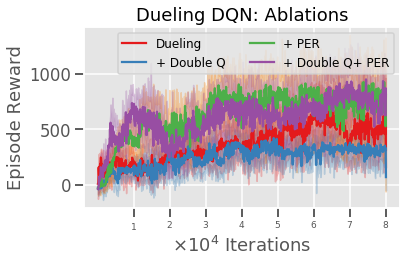

In [392]:
its_ticks = np.arange(10000, np.max(dueling_dqn.loc[:, "opt_counter"]), 10000)
its_labels_temp = [str(int(it/10000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
# Comparing all additions Plot
#rew_4 = plt.plot(dqn_capacity_20000.loc[:, "opt_counter"], dqn_capacity_20000.loc[:, "rew_mean"], label=r"DQN")
#plt.fill_between(dqn_capacity_20000.loc[:, "opt_counter"],
#                 dqn_capacity_20000.loc[:, "rew_mean"] - 2*dqn_capacity_20000.loc[:, "rew_sd"],
#                 dqn_capacity_20000.loc[:, "rew_mean"] + 2*dqn_capacity_20000.loc[:, "rew_sd"],
#                 color=rew_3[0].get_color(), alpha=0.25)

rew_1 = plt.plot(dueling_dqn.loc[:, "opt_counter"], dueling_dqn.loc[:, "rew_mean"], label=r"Dueling")
plt.fill_between(dueling_dqn.loc[:, "opt_counter"],
                 dueling_dqn.loc[:, "rew_mean"] - 2*dueling_dqn.loc[:, "rew_sd"],
                 dueling_dqn.loc[:, "rew_mean"] + 2*dueling_dqn.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(double_dueling_dqn.loc[:, "opt_counter"], double_dueling_dqn.loc[:, "rew_mean"], label=r"+ Double Q")
plt.fill_between(double_dueling_dqn.loc[:, "opt_counter"],
                 double_dueling_dqn.loc[:, "rew_mean"] - 2*double_dueling_dqn.loc[:, "rew_sd"],
                 double_dueling_dqn.loc[:, "rew_mean"] + 2*double_dueling_dqn.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_5 = plt.plot(per_dueling_dqn.loc[:, "opt_counter"], per_dueling_dqn.loc[:, "rew_mean"], label=r"+ PER")
plt.fill_between(per_dueling_dqn.loc[:, "opt_counter"],
                 per_dueling_dqn.loc[:, "rew_mean"] - 2*per_dueling_dqn.loc[:, "rew_sd"],
                 per_dueling_dqn.loc[:, "rew_mean"] + 2*per_dueling_dqn.loc[:, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

#rew_3 = plt.plot(per_double_dueling_dqn.loc[:, "opt_counter"], per_double_dueling_dqn.loc[:, "rew_mean"], label=r"+ Double Q+ PER")
#plt.fill_between(per_double_dueling_dqn.loc[:, "opt_counter"],
#                 per_double_dueling_dqn.loc[:, "rew_mean"] - 2*per_double_dueling_dqn.loc[:, "rew_sd"],
#                 per_double_dueling_dqn.loc[:, "rew_mean"] + 2*per_double_dueling_dqn.loc[:, "rew_sd"],
#                 color=rew_3[0].get_color(), alpha=0.25)

plt.xticks(its_ticks, its_labels, fontsize=9)
plt.xlabel(r"$\times 10^4$ Iterations")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12, ncol=2)
plt.title("Dueling DQN: Ablations")
plt.tight_layout()
plt.savefig(fig_dir + "dueling_dqn_all.png", dpi=300)

# Double Q Basic Sim

In [67]:
def Q_sin(s):
    return np.sin(s) - 0.5*np.cos(s)**2 + np.absolute(s/5)

n = 11
d = 3

def sample_and_fit_sin(n, d):
    # random_points = np.linspace(-6, 6, n)
    # random_points = np.random.uniform(low=-6, high=6, size=n)
    random_points = np.random.randint(low=-6, high=6, size=n-2)
    random_points = np.hstack(([-6,6], random_points))
    Q_samples = Q_sin(random_points)
    fit = np.polyfit(random_points, Q_samples, 6)
    fit_fct = np.poly1d(fit)
    return random_points, fit_fct, Q_samples

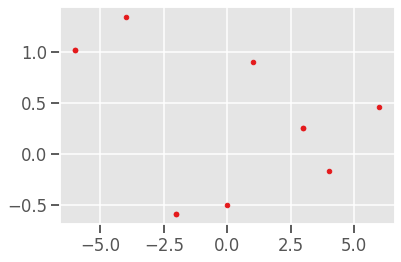

In [68]:
random_points, fit_fct, Q_samples = sample_and_fit_sin(n, d)
plt.plot(random_points, Q_samples, ".")

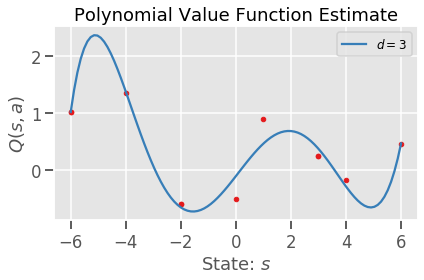

In [80]:
xp = np.linspace(-6, 6, 100)
plt.plot(random_points, Q_samples, '.')
plt.plot(xp, fit_fct(xp), '-', label=r"$d=3$")
# plt.plot(xp, Q_sin(xp), '--', label=r"$Q^*(s,a)$")
#plt.ylim(-1.5, 1.75)
plt.legend(fontsize=12)
plt.title("Polynomial Value Function Estimate")
plt.xlabel(r"State: $s$")
plt.ylabel(r"$Q(s,a)$")
plt.tight_layout()
plt.savefig("figures/ddqn_01.png", dpi=300)

In [70]:
random_points_2

array([-6,  6,  5,  0, -3,  3,  2,  3,  5, -3, -5,  4])

In [71]:
random_points_2 = np.array([-6,  6,  5,  0, -3,  3,  2,  3,  5, -3, -5, 4])
Q_samples_2 = Q_sin(random_points_2)
fit_2 = np.polyfit(random_points_2, Q_samples_2, 6)
fit_fct_2 = np.poly1d(fit_2)

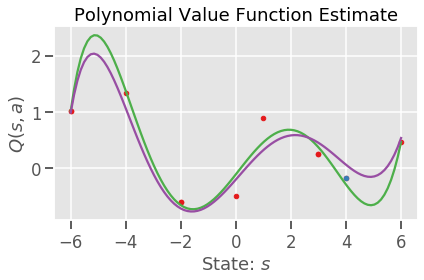

In [79]:
xp = np.linspace(-6, 6, 100)
plt.plot(random_points, Q_samples, '.')
plt.plot(4, Q_sin(4), '.')

plt.plot(xp, fit_fct(xp), '-', label=r"$d=3$")
plt.plot(xp, fit_fct_2(xp), '-', label=r"$d=3$")
# plt.plot(xp, Q_sin(xp), '--', label=r"$Q^*(s,a)$")
# plt.legend(fontsize=12)
plt.title("Polynomial Value Function Estimate")
plt.xlabel(r"State: $s$")
plt.ylabel(r"$Q(s,a)$")
plt.tight_layout()
plt.savefig("figures/ddqn_02.png", dpi=300)

In [22]:
def get_action_value_fits(sample_and_fit_fct, number_actions, n, d):
    fits = []
    
    for a in range(number_actions):
        random_points, fit_fct, Q_samples = sample_and_fit_fct(n, d)
        fits.append(fit_fct)
    return fits

In [23]:
fits_sin = get_action_value_fits(sample_and_fit_sin, 10, n, d)

/Users/rtl/anaconda2/envs/bo-drl-evo/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


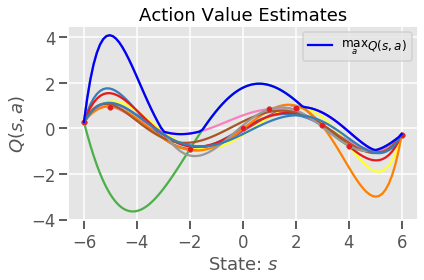

In [24]:
est_values = []
for fit_fct in fits_sin:
    plt.plot(random_points, Q_samples, '.')
    est = fit_fct(xp)
    est_values.append(est)
    plt.plot(xp, est, '-')
    #plt.ylim(-1.5, 1.5)
max_Q = np.array(est_values).T.max(axis=1)
plt.plot(xp, max_Q, label=r"$\max_{a} Q(s, a)$", c="b")    
plt.legend(fontsize=12)
plt.title("Action Value Estimates")
plt.xlabel(r"State: $s$")
plt.ylabel(r"$Q(s,a)$")
plt.tight_layout()
plt.savefig("figures/ddqn_02.png", dpi=300)

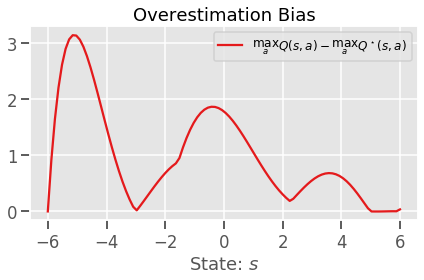

In [25]:
plt.plot(xp, max_Q - Q_sin(xp), '-', label=r"$\max_{a} Q(s, a) - \max_{a} Q^\star (s,a)$")
plt.legend(fontsize=12)
plt.title("Overestimation Bias")
plt.xlabel(r"State: $s$")
plt.tight_layout()
plt.savefig("figures/ddqn_03.png", dpi=300)

In [26]:
fits_sin_2 = get_action_value_fits(sample_and_fit_sin, 10, n, d)
est_values_2 = []
for fit_fct in fits_sin_2:
    est = fit_fct(xp)
    est_values_2.append(est)

/Users/rtl/anaconda2/envs/bo-drl-evo/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


In [27]:
arg_a = np.array(est_values_2).T.argmax(axis=1)
q_target = np.array(est_values).T
q_double = np.array([q_target[s, i] for s, i in enumerate(arg_a)])

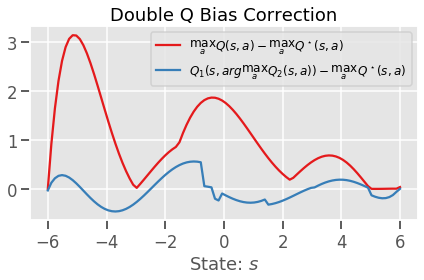

In [28]:
plt.plot(xp, max_Q - Q_sin(xp), '-', label=r"$\max_{a} Q(s, a) - \max_{a} Q^\star (s,a)$")
plt.plot(xp, q_double - Q_sin(xp), '-', label=r"$Q_1(s, arg\max_{a} Q_2(s, a)) - \max_{a} Q^\star (s,a)$")
plt.legend(fontsize=12)
plt.title("Double Q Bias Correction")
plt.xlabel(r"State: $s$")
plt.tight_layout()
plt.savefig("figures/ddqn_04.png", dpi=300)

# Prioritized Experience Replay Hyperparams

In [289]:
n = 20
y_pos = np.arange(n)
td_errs = np.random.uniform(low=-10, high=10, size=n)

prop = np.absolute(td_errs) + 1e-4
order = np.absolute(td_errs).argsort()
ranks = 1/(np.flip(order.argsort())+1)

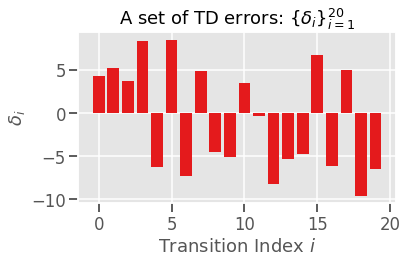

In [294]:
plt.bar(y_pos, td_errs)
plt.xlabel(r"Transition Index $i$")
plt.ylabel(r"$\delta_i$")
plt.title(r"A set of TD errors: $\{\delta_i\}_{i=1}^{20}$")
plt.tight_layout()
plt.savefig("figures/per_tds.png", dpi=300)

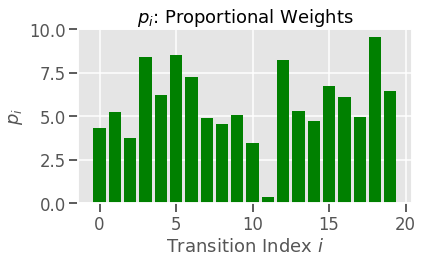

In [314]:
plt.bar(y_pos, prop, color="g")
plt.xlabel(r"Transition Index $i$")
plt.ylabel(r"$p_i$")
plt.title(r"$p_i$: Proportional Weights")
plt.tight_layout()
plt.savefig("figures/per_prop_weights.png", dpi=300)

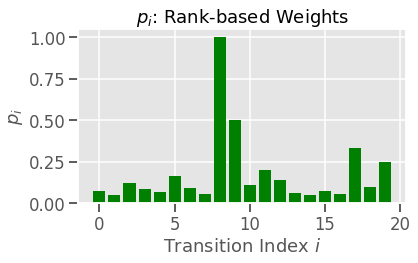

In [315]:
plt.bar(y_pos, ranks, color="g")
plt.xlabel(r"Transition Index $i$")
plt.ylabel(r"$p_i$")
plt.title(r"$p_i$: Rank-based Weights")
plt.tight_layout()
plt.savefig("figures/per_rank_weights.png", dpi=300)

In [300]:
def dist(alpha, p):
    return p**alpha/(p**alpha).sum()

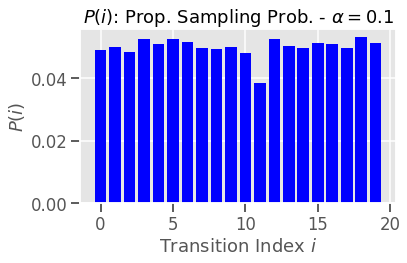

In [323]:
plt.bar(y_pos, dist(0.1, prop), color="b")
plt.xlabel(r"Transition Index $i$")
plt.ylabel(r"$P(i)$")
plt.title(r"$P(i)$: Prop. Sampling Prob. - $\alpha=0.1$")
plt.tight_layout()
plt.savefig("figures/per_prop_01.png", dpi=300)

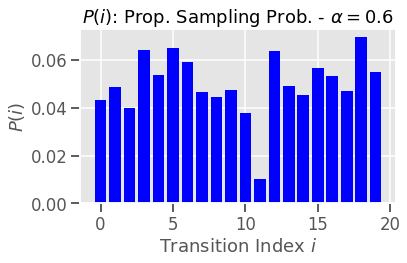

In [324]:
plt.bar(y_pos, dist(0.6, prop), color="b")
plt.xlabel(r"Transition Index $i$")
plt.ylabel(r"$P(i)$")
plt.title(r"$P(i)$: Prop. Sampling Prob. - $\alpha=0.6$")
plt.tight_layout()
plt.savefig("figures/per_prop_06.png", dpi=300)

Text(0.5, 1.0, '$P(i)$: Rank Sampling Prob. - $\\alpha=0.1$')

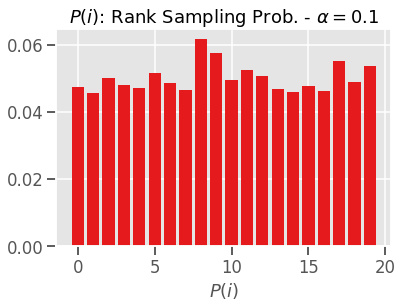

In [313]:
plt.bar(y_pos, dist(0.1, ranks))
plt.xlabel(r"Transition Index $i$")
plt.xlabel(r"$P(i)$")
plt.title(r"$P(i)$: Rank Sampling Prob. - $\alpha=0.1$")

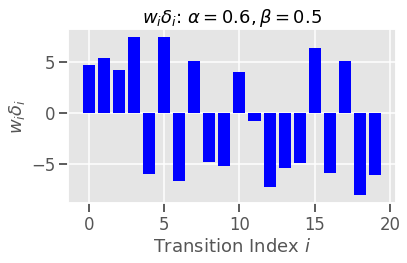

In [327]:
p = dist(0.6, prop)
beta_05 = 0.5
w_05 = (1/n * 1/p)**beta_05

plt.bar(y_pos, w_05*td_errs, color="b")
plt.xlabel(r"Transition Index $i$")
plt.ylabel(r"$w_i \delta_i$")
plt.title(r"$w_i \delta_i$: $\alpha=0.6, \beta=0.5$")
plt.tight_layout()
plt.savefig("figures/per_td_is_05.png", dpi=300)

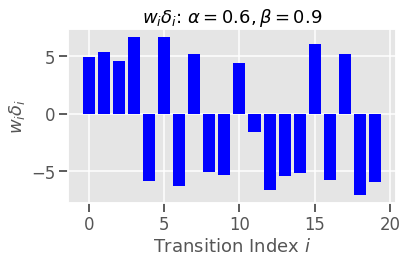

In [328]:
p = dist(0.6, prop)
beta_05 = 0.9
w_05 = (1/n * 1/p)**beta_05

plt.bar(y_pos, w_05*td_errs, color="b")
plt.xlabel(r"Transition Index $i$")
plt.ylabel(r"$w_i \delta_i$")
plt.title(r"$w_i \delta_i$: $\alpha=0.6, \beta=0.9$")
plt.tight_layout()
plt.savefig("figures/per_td_is_09.png", dpi=300)